In [2]:
from matplotlib.colors import ListedColormap
from sklearn import datasets, cross_validation, linear_model, metrics
%pylab inline
import numpy  as  np

C:\Users\Admin\Miniconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Populating the interactive namespace from numpy and matplotlib


# Генерация данных

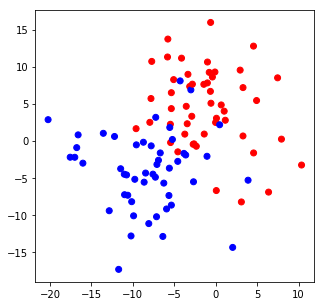

In [3]:
X,y=datasets.make_blobs(centers=2, cluster_std=5.5, random_state=1)
color=ListedColormap(["red", "blue"])
pylab.figure(figsize(5,5))
pylab.scatter(X[:,0], X[:,1], c=y, cmap=color)

In [4]:
# разбиение на тестовую и тренировочную выборки

In [5]:
X_train, X_test, Y_train, Y_test = cross_validation.train_test_split (X, y, test_size=0.2, random_state=1)


In [6]:
print(X_train[:5])

[[ -9.60218584   1.63192762]
 [  2.95484887   9.52755132]
 [ -0.08882962   9.27476627]
 [ -7.23019603   3.15939381]
 [-16.01972766  -3.02174517]]


# Линейные классификации

In [7]:
# ridge classifier. Гребневая классификация, регуляризация по L2
ridge_classifier= linear_model.RidgeClassifier(random_state=1)

In [8]:
#обучение
ridge_classifier.fit(X_train, Y_train)

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
        max_iter=None, normalize=False, random_state=1, solver='auto',
        tol=0.001)

In [9]:
#предсказания на тестовой выбрке
ridge_predictions=ridge_classifier.predict(X_test)

In [10]:
print(Y_test)

[0 0 0 1 0 0 0 0 0 1 0 1 0 1 1 1 0 0 0 1]


In [11]:
print( ridge_predictions)

[0 0 0 1 0 1 0 0 0 1 0 1 0 1 1 1 1 0 1 1]


In [12]:
#оценка качества
metrics.accuracy_score(Y_test, ridge_predictions)

0.85

In [13]:
#веса признаков
ridge_classifier.coef_

array([[-0.08213844, -0.07265405]])

In [14]:
#коэфф при свободном члене
ridge_classifier.intercept_

array([-0.29908619])

In [15]:
#ЛОГИСТИЧЕСКАЯ РЕГРЕССИЯ

In [16]:
log_regression=linear_model.LogisticRegression(random_state=1)

In [17]:
log_regression.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=1, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [18]:
log_predict=log_regression.predict(X_test)
log_predict_prob=log_regression.predict_proba(X_test) # вероятности , с которыми объект принадлежит томи или иному классу

In [19]:
print(Y_test)

[0 0 0 1 0 0 0 0 0 1 0 1 0 1 1 1 0 0 0 1]


In [20]:
print(log_predict)

[0 1 1 1 0 1 0 0 0 1 0 1 0 1 1 1 1 0 1 1]


In [21]:
print(log_predict_prob) # первая метка - вероятность приадлежности к классу 0, вторая - к классу 1

[[0.99845844 0.00154156]
 [0.42680255 0.57319745]
 [0.46641955 0.53358045]
 [0.00908068 0.99091932]
 [0.73840809 0.26159191]
 [0.26229171 0.73770829]
 [0.98761918 0.01238082]
 [0.97059108 0.02940892]
 [0.93585596 0.06414404]
 [0.16054505 0.83945495]
 [0.90812619 0.09187381]
 [0.01407685 0.98592315]
 [0.84177067 0.15822933]
 [0.06918031 0.93081969]
 [0.00545054 0.99454946]
 [0.00156379 0.99843621]
 [0.24992264 0.75007736]
 [0.90959432 0.09040568]
 [0.24927032 0.75072968]
 [0.00142246 0.99857754]]


In [22]:
metrics.accuracy_score(Y_test, log_predict)

0.75

In [23]:
log_regression.coef_


array([[-0.35616691, -0.30325491]])

In [24]:
log_regression.intercept_

array([-0.97653459])

# Оценка качества по кросс-валидации

In [25]:
ridge_score=cross_validation.cross_val_score(ridge_classifier, X, y, scoring="accuracy", cv=10)

In [26]:
log_score=cross_validation.cross_val_score(log_regression, X, y, scoring="accuracy", cv=10)

In [27]:
print("Ridge score mean {}, std {}, max {}, min {}".format(round(ridge_score.mean(),3), round(ridge_score.std(), 3), ridge_score.max(), ridge_score.min()))

Ridge score mean 0.88, std 0.087, max 1.0, min 0.7


In [28]:
print("Log score mean {}, std {}, max {}, min {}".format(round(log_score.mean(),3), round(log_score.std(), 3), log_score.max(), log_score.min()))

Log score mean 0.87, std 0.1, max 1.0, min 0.7


# Пользовательская оценка качества

In [29]:
#для передачи своей метрики качества создаем объект scorer, в make_scorer передаем 1.модель, кот оцениваем, 2.набор меток, 3. набор предсказаний
scorer=metrics.make_scorer(metrics.accuracy_score)

In [30]:
# задаем свою стратегию валидации :)
cv_strategy = cross_validation.StratifiedShuffleSplit(y, n_iter=20, test_size=0.4, random_state=2)

In [31]:
ridge_score= cross_validation.cross_val_score(ridge_classifier, X, y, cv=cv_strategy, scoring=scorer)
log_csore=cross_validation.cross_val_score(log_regression, X, y, scoring=scorer, cv=cv_strategy)

In [32]:
print("Ridge score mean {}, std {}, max {}, min {}".format(round(ridge_score.mean(),3), round(ridge_score.std(), 3), ridge_score.max(), ridge_score.min()))

Ridge score mean 0.871, std 0.041, max 0.95, min 0.8


In [33]:
print("Log score mean {}, std {}, max {}, min {}".format(round(log_score.mean(),3), round(log_score.std(), 3), log_score.max(), log_score.min()))

Log score mean 0.87, std 0.1, max 1.0, min 0.7


# Регрессия!!

In [34]:
#линейная регрессия (МНК)

X, y, coef=datasets.make_regression(n_features=2, n_informative=1, coef=True, noise=5., random_state=1, n_targets=1)

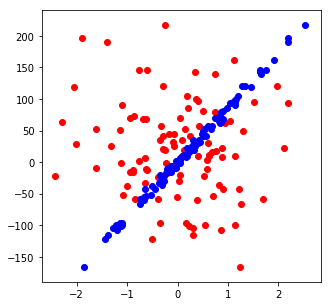

In [35]:
pylab.scatter(X[:,0],y, c="r")
pylab.scatter(X[:,1],y, c="b")

In [36]:
X_train, X_test, Y_train, Y_test=cross_validation.train_test_split(X,y,test_size=0.3, random_state=1)

In [37]:
lin_regr=linear_model.LinearRegression()
lin_regr.fit(X_train, Y_train)
predictions=lin_regr.predict(X_test)

In [38]:
print(Y_test)

[ -10.6671984   -58.63512949 -121.10042556   62.1275544    42.0074159
   -9.35026544   96.54903423  -20.87845024   56.48108863  -54.57768883
   22.42129899  -33.02108575    7.89258718   -0.80957785   11.0958702
   17.6480634   118.67083827  121.04446759  139.22729693  -16.12999604
    9.04033664  -42.93566344    6.00113825   95.40421772    3.34692486
   73.33862279 -101.17906152   69.04240795   19.04658482 -107.65371972]


In [39]:
print(predictions)

[ -17.56170662  -59.48753042 -124.51888175   73.04499068   49.02821848
   -3.34497053   97.33007746  -29.34158953   52.48554928  -57.63882133
   25.22465562  -32.20807834   14.37586717    4.07835052   10.87331872
   20.40317168  126.21726183  110.83606179  143.91705589  -16.41421663
    7.21584054  -55.33458193    4.604206     98.45817297    4.13170129
   73.26876412  -96.12145934   68.71153954   27.86360297 -103.06292666]


In [40]:
metrics.mean_absolute_error(Y_test, predictions)

4.347633784042375

In [41]:
lin_score=cross_validation.cross_val_score(lin_regr, X, y, scoring="mean_absolute_error", cv=10 )

C:\Users\Admin\Miniconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Admin\Miniconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Admin\Miniconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Admin\Miniconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Admin\Minic

In [42]:
print("Lin regression mean {}, std {}".format(lin_score.mean(), lin_score.std() ))

Lin regression mean -4.219526274268924, std 0.9290149790919314


In [43]:
scorer=metrics.make_scorer(metrics.mean_absolute_error, greater_is_better=True) # это нижно чтоб избавиться от -1

In [44]:
lin_score=cross_validation.cross_val_score(lin_regr, X, y, scoring=scorer, cv=10 )
print("Lin regression mean {}, std {}".format(lin_score.mean(), lin_score.std() ))

Lin regression mean 4.219526274268924, std 0.9290149790919314


In [45]:
coef

array([ 0.        , 86.44794301])

In [46]:
lin_regr.coef_

array([ 0.22131872, 86.39411091])

In [47]:
print("исходное уравнение y= {:.2f}*x0+{:.2f}*x1".format(coef[0], coef[1]))

исходное уравнение y= 0.00*x0+86.45*x1


In [48]:
# LASSO регрессия, регуляризация по l1 (убирает незначащие коэффициенты)

In [49]:
lasso_regr=linear_model.Lasso(random_state=42)
lasso_regr.fit(X_train, Y_train)
preds=lasso_regr.predict(X_test)

In [50]:
metrics.mean_absolute_error(Y_test, preds)

4.204546264313096

In [51]:
lasso_score=cross_validation.cross_val_score(lasso_regr, X,y, scoring=scorer, cv=10)

In [52]:
print("Lassp regression mean {}, std {}".format(lin_score.mean(), lin_score.std() ))

Lassp regression mean 4.219526274268924, std 0.9290149790919314


In [53]:
lasso_regr.coef_

array([-0.        , 85.08738005])

# Метрики качества

In [55]:
Xr, yr = datasets.make_regression(n_features=2, n_informative=1, n_targets=1, random_state=7, noise=5.)

In [57]:
Xc, yc = datasets.make_classification(n_features=2, n_informative=2, n_classes=2, 
                                      random_state=7, n_clusters_per_class=1, n_redundant=0)

Text(0.5,1,'Classification')

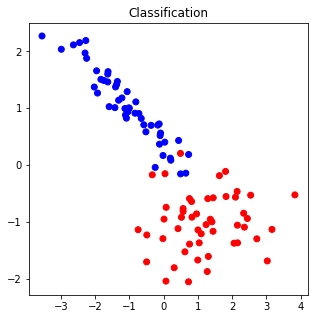

In [62]:
pylab.scatter(Xc[:,0],  Xc[:,1],  c=yc, cmap=color)
pylab.title("Classification")

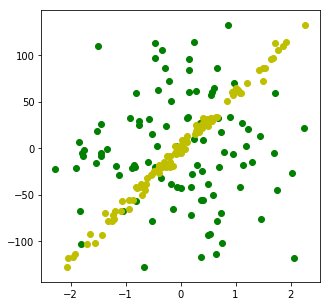

In [63]:
pylab.scatter(Xr[:,0], yr, c="g")
pylab.scatter(Xr[:,1], yr, c="y")

In [68]:
Xr_train, Xr_test, yr_train, yr_test = cross_validation.train_test_split(Xr, yr, test_size=0.3, random_state=1)

In [69]:
Xc_train, Xc_test, yc_train, yc_test= cross_validation.train_test_split(Xc, yc, test_size=0.3, random_state=1)

In [102]:
classifier=linear_model.SGDClassifier(loss='log', random_state=1, max_iter=5)
classifier.fit(Xc_train, yc_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='log', max_iter=5, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=1, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [103]:
cpredicts=classifier.predict(Xc_test)

In [104]:
cpredicts_proba=classifier.predict_proba(Xc_test)

In [105]:
#accuracy
acc=sum([1.0 if pair[0]==pair[1] else 0. for pair in zip(cpredicts, yc_test)])/len(Yc_test)

In [106]:
print(acc)

0.9666666666666667


In [107]:
metrics.accuracy_score(yc_test, cpredicts)

0.9666666666666667

In [108]:
#confusion matrix
conf_matrix=metrics.confusion_matrix(yc_test, cpredicts)

In [109]:
conf_matrix

array([[17,  1],
       [ 0, 12]], dtype=int64)

In [110]:
conf_matrix.diagonal().sum() #сумма правильно смоделированных ответов, стоящих на диагонали

29

In [111]:
# precision
metrics.precision_score(yc_test, cpredicts, pos_label=0) # точность предсказания объектов 0-го класса

1.0

In [112]:
metrics.precision_score(yc_test, cpredicts)

0.9230769230769231

In [113]:
#recall
metrics.recall_score(yc_test, cpredicts, pos_label=0)


0.9444444444444444

In [114]:
metrics.recall_score(yc_test, cpredicts)

1.0

In [115]:
# f1 F мера
metrics.f1_score(yc_test, cpredicts, pos_label=0)

0.9714285714285714

In [116]:
metrics.f1_score(yc_test, cpredicts, pos_label=1)

0.9600000000000001

In [117]:
print(metrics.classification_report(yc_test, cpredicts))

             precision    recall  f1-score   support

          0       1.00      0.94      0.97        18
          1       0.92      1.00      0.96        12

avg / total       0.97      0.97      0.97        30



In [118]:
# ROC curve
fpr, tpr, _ = metrics.roc_curve(yc_test, cpredicts_proba[:,1])  # строим для первого класса

Text(0.5,1,'ROC curve')

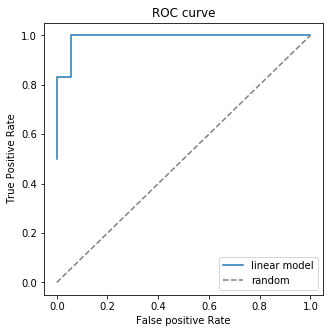

In [129]:
pylab.plot(fpr, tpr, label="linear model")
pylab.plot([0,1], [0,1], "--", c="grey", label ="random")
pylab.xlim(-0.05, 1.05)
pylab.ylim(-0.05, 1.05)
pylab.xlabel("False positive Rate")
pylab.ylabel("True Positive Rate")
pylab.legend(loc="lower right")
pylab.title("ROC curve")



In [130]:
# ROC-AUC площадь
metrics.roc_auc_score(yc_test, cpredicts)

0.9722222222222222

In [132]:
metrics.roc_auc_score(yc_test, cpredicts_proba[:,1])

0.9907407407407407

In [133]:
metrics.roc_auc_score(yc_test, cpredicts_proba[:,0])

0.009259259259259262

In [134]:
# precision AUC
metrics.average_precision_score(yc_test, cpredicts)

0.9230769230769231

In [135]:
# log_loss. Чем меньше, тем лучше
metrics.log_loss(yc_test, cpredicts_proba[:,1])

0.2801206244766808

# Метрики качества для регрессии

In [138]:
regressor=linear_model.SGDRegressor(max_iter=20, random_state=1)

In [139]:
regressor.fit(Xr_train, yr_train)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=20, n_iter=None, penalty='l2',
       power_t=0.25, random_state=1, shuffle=True, tol=None, verbose=0,
       warm_start=False)

In [141]:
rpredicts=regressor.predict(Xr_test)

In [143]:
metrics.mean_absolute_error(yr_test, rpredicts)

3.748761311885298

In [145]:
metrics.mean_squared_error(yr_test, rpredicts)

24.114925597460914

In [ ]:
# корень средеквадратичного отклонения

In [146]:
sqrt(metrics.mean_squared_error(yr_test, rpredicts))

4.91069502183356

In [147]:
metrics.r2_score(yr_test, rpredicts)

0.989317615054695